<a href="https://colab.research.google.com/github/mohammadbadi/Clustering_FE_MCA/blob/main/Code%20Sections/5.5%20KMeans%20Feature%20Importance%20K-Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.5 K-Means Feature Importance and K-Elbow - Approach 3**

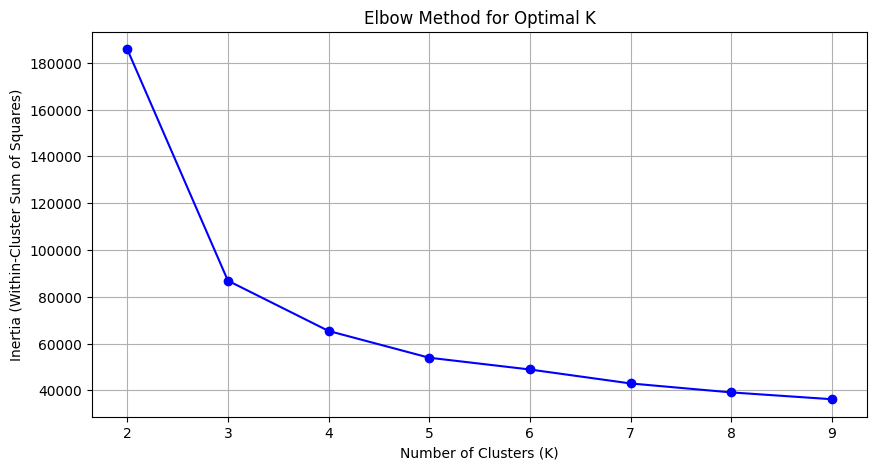

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

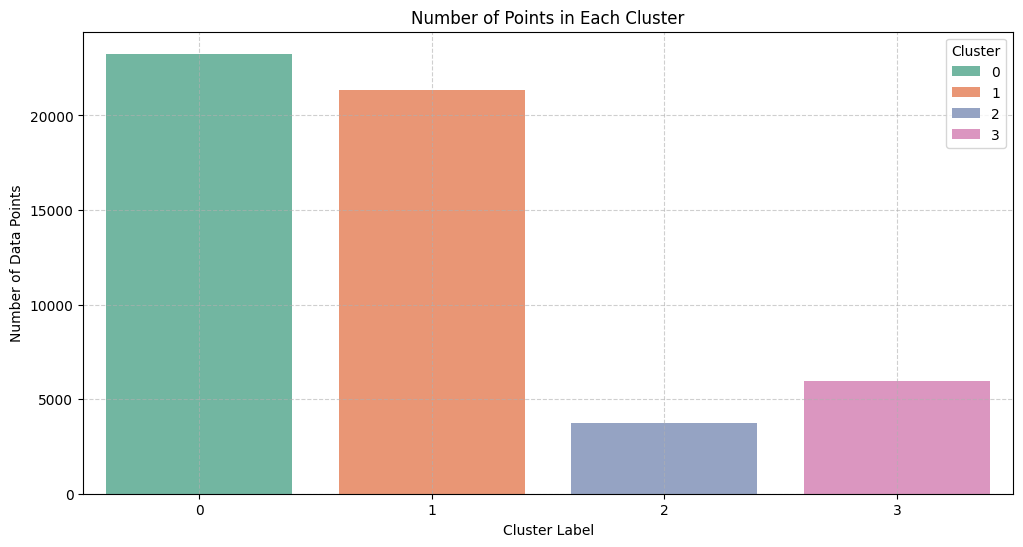

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

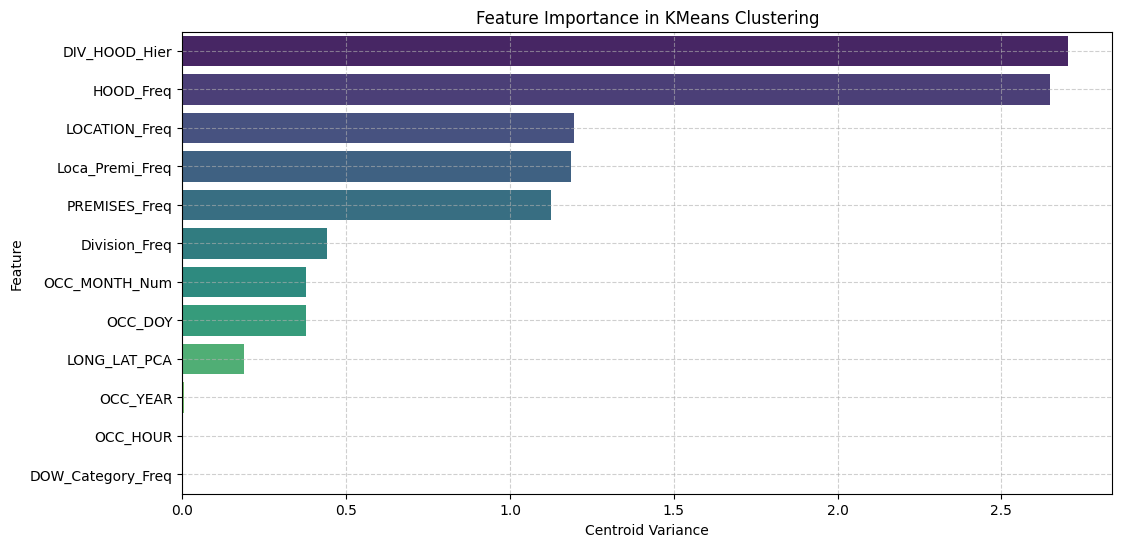

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from IPython.display import display, HTML
from google.colab import files

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Read the updated dataset from the new URL
url = "https://raw.githubusercontent.com/mohammadbadi/Clustering_FE_MCA/refs/heads/main/Output_CSV/FE_Encoded_New.csv"
df = pd.read_csv(url)

# Define features based on the current project.
continuous_features = ['OCC_YEAR', 'OCC_DOY', 'OCC_HOUR']
numeric_features = ['OCC_MONTH_Num']
frequency_features = ['Division_Freq', 'LOCATION_Freq', 'PREMISES_Freq', 'Loca_Premi_Freq', 'HOOD_Freq','DIV_HOOD_Hier','DOW_Category_Freq']
pca_feature = ['LONG_LAT_PCA']
features = continuous_features + numeric_features + frequency_features + pca_feature

# Build preprocessor and pipeline for KMeans clustering with n_clusters=4
scaler = StandardScaler()
preprocessor = ColumnTransformer([('num', scaler, features)])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42, n_init=10))
])
pipeline.fit(df)
df_processed = pipeline.transform(df)

# Extract the KMeans model and assign cluster labels
kmeans = pipeline.named_steps['kmeans']
df['Cluster'] = kmeans.labels_

# Compute centroid variance (feature importance)
centroids = kmeans.cluster_centers_
centroid_variance = np.var(centroids, axis=0)
importance_df = pd.DataFrame({'Feature': features, 'Centroid Variance': centroid_variance})\
                  .sort_values(by='Centroid Variance', ascending=False)

# Compute evaluation metrics for the clustering with n=4
sil_score = silhouette_score(df_processed, kmeans.labels_)
db_index = davies_bouldin_score(df_processed, kmeans.labels_)
ch_index = calinski_harabasz_score(df_processed, kmeans.labels_)
final_inertia = kmeans.inertia_

# ---------------------- Elbow Method: Calculate inertia for K=2 to 9 ----------------------
inertia_values = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_processed)
    inertia_values.append(km.inertia_)

# Plot the elbow method curve WITHOUT numeric annotations
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.savefig("Elbow_Method.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("Elbow_Method.png")
display(HTML("<br><br>"))

# ---------------------- Text Output: Inertia Values for K-Elbow ----------------------
inertia_html = """
<p style="color: darkblue; font-size: 18px; font-weight: bold;">
    Inertia values for different K:
"""
for k, inertia in zip(K_range, inertia_values):
    inertia_html += f"<br>For K = <span style='color: blue;'>{k}</span>: <span style='color: blue;'>{inertia:.2f}</span>"
inertia_html += "</p>"
display(HTML(inertia_html))
display(HTML("<br><br>"))

# ---------------------- Cluster Distribution: Number of Data Points per Cluster ----------------------
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot the cluster distribution WITHOUT numeric annotations on bars
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Cluster', hue='Cluster', palette="Set2", dodge=False)
plt.title("Number of Points in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("Cluster_Distribution.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("Cluster_Distribution.png")
display(HTML("<br><br>"))

# ---------------------- Text Output: Cluster Distribution ----------------------
cluster_html = """
<p style="color: darkblue; font-size: 18px; font-weight: bold;">
    Number of data points in each cluster:
"""
for cluster, count in cluster_counts.items():
    cluster_html += f"<br><span style='color: blue;'>Cluster {cluster}</span>: <span style='color: green;'>{count}</span> data points"
cluster_html += "</p>"
display(HTML(cluster_html))
display(HTML("<br><br>"))

# ---------------------- Plot: K-Means Feature Importance ----------------------
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Centroid Variance', y='Feature', palette='viridis')
plt.xlabel("Centroid Variance")
plt.ylabel("Feature")
plt.title("Feature Importance in KMeans Clustering")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig("KMeans_Feature_Importance.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("KMeans_Feature_Importance.png")
display(HTML("<br><br>"))

# ---------------------- Build HTML Table for K-Means Clustering Analysis ----------------------
html_table = f"""
<table style='border-collapse: collapse; font-size: 18px; width: 100%; max-width: 900px; table-layout: fixed;'>
    <thead>
        <tr style='background-color: #2f4f4f; color: white;'>
            <th colspan="3" style="text-align: center; font-size: 24px; padding: 8px;">
                KMEANS Clustering Analysis
            </th>
        </tr>
        <tr>
            <td colspan="3" style="border: 1px solid #dddddd; padding: 8px; text-align: center; white-space: normal; word-wrap: break-word;">
                Based on the K-Elbow method and evaluation metrics, KMeans was performed with 4 clusters (n=4).<br>
                <strong>Silhouette Score:</strong> {sil_score:.2f},
                <strong>Davies-Bouldin Index:</strong> {db_index:.2f},
                <strong>Calinski-Harabasz Index:</strong> {ch_index:.2f}, and
                <strong>Inertia:</strong> {final_inertia:.2f}.<br>
                Centroid Variance indicates each feature’s contribution to the clustering structure.
            </td>
        </tr>
        <tr style='background-color: #4CAF50; color: white;'>
            <th style='border: 1px solid #dddddd; padding: 8px;'>S/N</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Feature</th>
            <th style='border: 1px solid #dddddd; padding: 8px;'>Centroid Variance</th>
        </tr>
    </thead>
    <tbody>
"""
for idx, row in enumerate(importance_df.itertuples(), start=1):
    html_table += f"""
        <tr style='border: 1px solid #dddddd;'>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: center;'>{idx}</td>
            <td style='border: 1px solid #dddddd; padding: 8px;'>{row.Feature}</td>
            <td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{row[2]:.4f}</td>
        </tr>
    """
html_table += """
    </tbody>
</table>
"""
display(HTML(html_table))
display(HTML("<br><br>"))

# Save the HTML table as a file and download it
html_table_path = "KMeans_Feature_Importance.html"
with open(html_table_path, "w", encoding="utf-8") as f:
    f.write(html_table)
files.download(html_table_path)

# Save the updated dataset with cluster labels and download it
output_dataset = "FE_Encoded_with_Clusters.csv"
df.to_csv(output_dataset, index=False)
files.download(output_dataset)

# ---------------------- Rationale Explanation for Choosing n=4 ----------------------
if len(inertia_values) >= 5:
    inertia_reduction_k3_k4 = ((inertia_values[1] - inertia_values[2]) / inertia_values[1]) * 100
    inertia_reduction_k4_k5 = ((inertia_values[2] - inertia_values[3]) / inertia_values[2]) * 100
else:
    inertia_reduction_k3_k4 = inertia_reduction_k4_k5 = 0

explanation = f"""
<p style="color: black; font-size: 18px; font-weight: bold;">
    The K-Elbow method shows that the inertia value decreases notably as K increases from <span style="color: blue;">2</span> to <span style="color: blue;">4</span>. For example, when K increases from <span style="color: blue;">2</span> to <span style="color: blue;">3</span>, inertia decreases from <span style="color: blue;">{inertia_values[0]:.2f}</span> to <span style="color: blue;">{inertia_values[1]:.2f}</span>, and from K = <span style="color: blue;">3</span> to K = <span style="color: blue;">4</span> it decreases to <span style="color: blue;">{inertia_values[2]:.2f}</span> (a reduction of <span style="color: blue;">{inertia_reduction_k3_k4:.1f}%</span>). Beyond K = <span style="color: blue;">4</span>, the reduction in inertia becomes less dramatic (e.g. a further reduction of <span style="color: blue;">{inertia_reduction_k4_k5:.1f}%</span> from K = <span style="color: blue;">4</span> to K = <span style="color: blue;">5</span>).
</p>
<p style="color: black; font-size: 18px; font-weight: bold;">
    The cluster distribution is also reasonable:
    <br><span style="color: blue;">Cluster 0</span>: <span style="color: green;">{cluster_counts.get(0, 0)}</span> data points
    <br><span style="color: blue;">Cluster 1</span>: <span style="color: green;">{cluster_counts.get(1, 0)}</span> data points
    <br><span style="color: blue;">Cluster 2</span>: <span style="color: green;">{cluster_counts.get(2, 0)}</span> data points
    <br><span style="color: blue;">Cluster 3</span>: <span style="color: green;">{cluster_counts.get(3, 0)}</span> data points
</p>
<p style="color: black; font-size: 18px; font-weight: bold;">
    Based on the significant drop in inertia up to K = <span style="color: blue;">4</span> and a balanced cluster distribution, using <span style="color: blue;">4</span> clusters (n=4) for KMeans clustering is a good choice.
</p>
"""
display(HTML(explanation))
